# Ultralytics

<img src="images/ultralytics.png" alt="detr" width="500"/> 

[Ultralytics](https://docs.ultralytics.com/) est une library python très utile lorsque l'on a besoin d'utiliser ou d'entraîner des modèles YOLO. La documentation sur leur site est très complète mais nous allons quand même présenter deux modèles YOLO dans ce notebook. Nous verrons dans une dernière partie que la library offre aussi la possibilité d'utiliser [SAM](https://segment-anything.com/) (*segment anything*).

## YOLO 

En regardant la liste des modèles YOLO, on peut être vite perdu en voyant la variété de modèles (YOLOv4, YOLOv5, YOLO-NAS etc ...).       
De manière générale, j'aurai tendance à vous inviter à tester les différents modèles et à vous faire une idée par vous-même. Les auteurs des différentes version de YOLO ne sont pas les mêmes donc c'est difficile de dire avec certitude quelle version est la meilleure.

### [YOLOv8](https://sh-tsang.medium.com/review-yolov8-object-detection-5214fa105731)

Pour la plupart des modèles YOLO (sauf YOLO-World), le façon de charger le modèle et de faire l'inférence est la même.   
En arrivant sur le page de [docs de YOLOv8](https://docs.ultralytics.com/models/yolov8/#performance-metrics), vous pourrez constater qu'il y a plusieurs modèles à disposition.  

<img src="images/yolov8.png" alt="yolov8" width="600"/> 


YOLOv8 permet de réaliser des tâches autre que la détection : 
- [La segmentation sémantique](https://docs.ultralytics.com/tasks/segment/)
- [L'estimation de la pose](https://docs.ultralytics.com/tasks/pose/) : La position d'une personne dans l'image (son squelette)
- [La détection orientée](https://docs.ultralytics.com/fr/tasks/obb/#visual-samples) : Les *bounding box* de détection peuvent être orientée
- [La classification](https://docs.ultralytics.com/tasks/classify/#export)

Dans ce notebook, nous allons regarder uniquement un exemple de détection.   

Pour commencer, vous devez d'abord télécharger un modèle. Le choix du modèle va dépendre des ressources de votre machine et de la vitesse de traitement désirée. Plus le modèle est "gros", plus il est performant mais moins il est rapide. 

Prenons le modèle le plus rapide, yolov8n.   
Voici comment vous pouvez le charger avec la library ultralytics :  

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# On charge le modèle pre-entrainé YOLOv8n
model = YOLO("yolov8n.pt")

# Affiche les informations du modèle
model.info()

# On fait une prédiction sur une image
results = model("images/coco.jpg")

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs

image 1/1 /Users/simonthomine/Documents/CoursDeepLearning/08_WIP_DetectionEtYolo/images/coco.jpg: 448x640 6 persons, 2 cars, 1 backpack, 3 handbags, 5 cell phones, 79.1ms
Speed: 1.1ms preprocess, 79.1ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


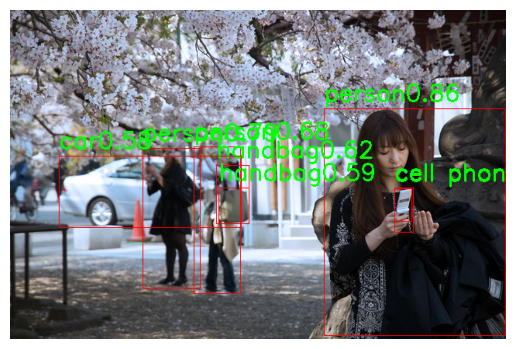

In [2]:
# Seuil de détection
threshold=0.5
# Les noms des classes
names={0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
image=cv2.imread("images/coco.jpg")
boxes = results[0].boxes.xyxy.cpu().numpy()
confidences=results[0].boxes.conf.cpu().numpy()
labels=results[0].boxes.cls.cpu().numpy()
# Affichage des résultats
for box,conf,label in zip(boxes,confidences,labels):
    box = box.astype(int)
    if conf>threshold:
        x1, y1, x2, y2 = box[:4]
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1) 
        cv2.putText(image, names[label]+str(conf)[:4], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#Conversion de l'image en RGB
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

En quelque ligne de code, on a pu utiliser le modèle YOLOv8 ! 

### [YOLO-World](https://arxiv.org/pdf/2401.17270)

YOLO-World est une nouvelle version de YOLO qui permet de faire de la détection d'objets *open-vocabulary*. Les versions antérieures de YOLO sont entrainées sur des classes spécifiques (en général les 80 classes de [COCO](https://cocodataset.org/#home)) et on a donc besoin des les ré-entraîner ou finetuner pour les utiliser sur d'autres classes. YOLO-World est *open-vocabulary* ce qui signifie qu'il peut détecter des objets de n'importe quelle classe. Il suffit de donner un prompt de la classe que l'on souhaite en même temps que l'image en entrée du modèle.  

<img src="images/yoloworld.png" alt="yolov8" width="600"/> 

Pour l'utiliser, c'est assez similaire à un autre modèle YOLO mis à part qu'il faut rajouter notre *prompt* textuel. 

In [3]:
# On charge le modèle pre-entrainé YOLOv8s-world
model = YOLO("yolov8s-worldv2.pt") 

# On définit les classes du modèle
model.set_classes(["person", "surfboard"])
names={0: 'person', 1: 'surfboard'}

# On fait une prédiction sur notre image
results = model.predict("images/coco2.jpg")


image 1/1 /Users/simonthomine/Documents/CoursDeepLearning/08_WIP_DetectionEtYolo/images/coco2.jpg: 640x384 2 persons, 1 surfboard, 155.2ms
Speed: 2.6ms preprocess, 155.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 384)


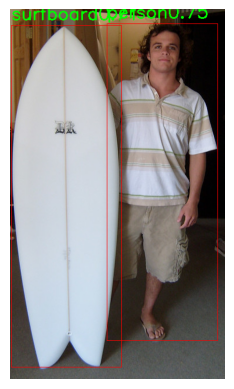

In [4]:
# Seuil de détection
threshold=0.5
# Les noms des classes
image=cv2.imread("images/coco2.jpg")
boxes = results[0].boxes.xyxy.cpu().numpy()
confidences=results[0].boxes.conf.cpu().numpy()
labels=results[0].boxes.cls.cpu().numpy()
# Affichage des résultats
for box,conf,label in zip(boxes,confidences,labels):
    box = box.astype(int)
    if conf>threshold:
        x1, y1, x2, y2 = box[:4]
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1) 
        cv2.putText(image, names[label]+str(conf)[:4], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

On détecte bien la personne et la planche de surf.

## Segment Anything (SAM)

[SAM](https://segment-anything.com/) est un modèle de segmentation qui permet de segmenter n'importe quel objet. Nous avons déjà utilisé ce modèle dans [le cours 6 sur HuggingFace](../06_HuggingFace/README.md). Il est également possible d'utilise ce modèle via la library ultralytics. A vous de voir ce que vous preferez. 

Voici comment l'utiliser avec ultralytics en python : 

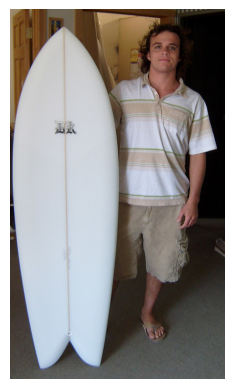

In [5]:
from PIL import Image
raw_image = Image.open("images/coco2.jpg")
plt.imshow(raw_image)
plt.axis('off')
plt.show()


Nous utilisons FastSAM qui est une version plus rapide de SAM. Vous pouvez télécharger les poids sur ce [lien](https://docs.ultralytics.com/models/fast-sam/#available-models-supported-tasks-and-operating-modes).

In [6]:
from ultralytics import FastSAM

resized_image=raw_image.resize((1024,1024))
model = FastSAM('./FastSAM-s.pt')

In [7]:
results = model(resized_image,retina_masks=True)


0: 640x640 30 objects, 292.8ms
Speed: 4.2ms preprocess, 292.8ms inference, 199.2ms postprocess per image at shape (1, 3, 640, 640)


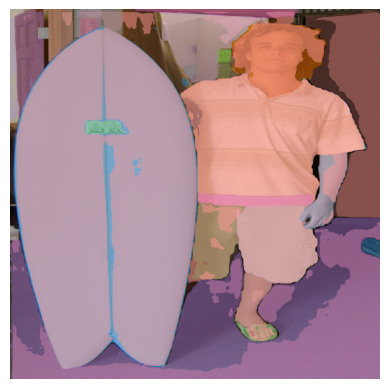

In [39]:
import numpy as np

def draw_masks(image,masks):
    image_np = np.array(image)
    plt.cm.get_cmap('tab20', 38)
    colors = plt.cm.get_cmap('tab20', 38)
    for i, mask in enumerate(masks):
        color = colors(i)[:3] 
        color = tuple(int(c * 255) for c in color) 
        mask =mask.data.squeeze().numpy()>0.5
        image_np[mask] = image_np[mask] * 0.5 + np.array(color) * 0.5       
    return image_np

image_np = draw_masks(resized_image,results[0].masks)
plt.imshow(image_np)
plt.axis('off')
plt.show()

Les résultats sont assez moyens mais il ne faut pas oublier qu'il s'agit du plus petit modèle de FastSAM et qu'il est très rapide (vous pouvez comparer au temps de traitement du notebook 2 du cours 6 sur Hugging Face).   
 
**Notes** : Il est également possible de faire des *prompts* qui sont des points, des *box* ou du texte (voir la [documentation](https://docs.ultralytics.com/models/fast-sam/#predict-usage) pour plus de détails).

Vous savez maintenant comment utiliser des modèles rapides de détection et de segmentation d'images avec la library ultralytics !